## Bank Churners

Number of entries: 10127
Number of features: 5


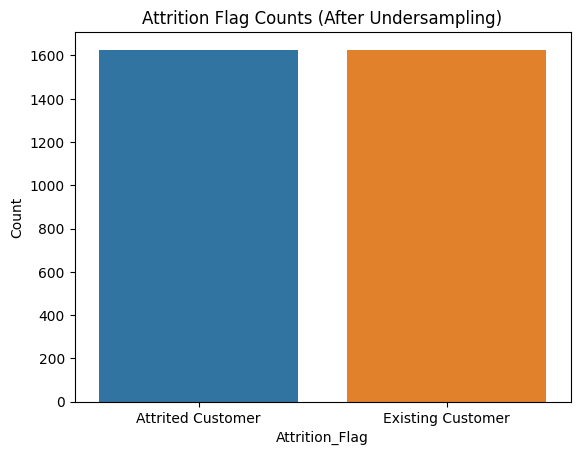

Attrition_Flag
Attrited Customer    1627
Existing Customer    1627
Name: count, dtype: int64


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import constants
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from graphs import plot_learning_curve
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
data = pd.read_csv('./datasets/BankChurners.csv')

# Define the target column and set random_state
target_column = 'Attrition_Flag'

# List of categorical columns to keep
columns_to_keep = ["Customer_Age", "Gender", "Education_Level", "Marital_Status", "Income_Category"]

# Drop all other categorical columns
X = data[columns_to_keep]
y = data[target_column]

num_entries = data.shape[0]
print("Number of entries:", num_entries)
num_features = X.shape[1]
print("Number of features:", num_features)

# Encode categorical features using one-hot encoding
categorical_cols = ["Gender", "Education_Level", "Marital_Status", "Income_Category"]
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Perform undersampling
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=random_state)
X_resampled, y_resampled = undersampler.fit_resample(X_encoded, y)

sns.countplot(data=pd.DataFrame({'Attrition_Flag': y_resampled}), x='Attrition_Flag')
plt.xlabel('Attrition_Flag')
plt.ylabel('Count')
plt.title('Attrition Flag Counts (After Undersampling)')
plt.show()

counts = pd.Series(y_resampled).value_counts()

# Now 'counts' contains the counts of each category ('Existing Customer' and 'Attrited Customer')
print(counts)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=random_state)


### Decision Trees

In [11]:
from dt import dt

param_grid = {
    'max_depth': [8,9,7,6,5],  # You can include 'None' for unlimited depth
    'min_samples_split': [9, 13, 14, 15],
    'min_samples_leaf': [1, 5, 9]
}

best_dt_model, best_dt_params = dt(X_train, X_test, y_train, y_test, param_grid)

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 13}
cross validation: 5
Accuracy: 0.5238095238095238
Classification Report:
                    precision    recall  f1-score   support

Attrited Customer       0.55      0.62      0.58       349
Existing Customer       0.48      0.41      0.44       302

         accuracy                           0.52       651
        macro avg       0.52      0.52      0.51       651
     weighted avg       0.52      0.52      0.52       651



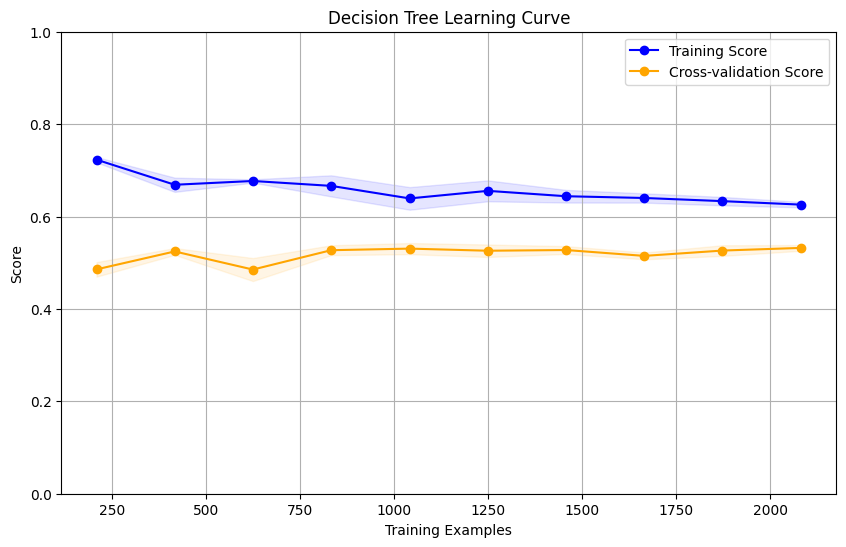

In [5]:
from graphs import plot_learning_curve
plot_learning_curve(best_dt_model, X_train, y_train, scoring='accuracy', title="Decision Tree Learning Curve")

### Neural Networks

In [4]:
from nn import nn

param_grid = {
    'hidden_layer_sizes': [(32,), (64,), (128,), (256,), (512,)],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.0001]
}

best_nn_model, best_nn_params = nn(X_train, X_test, y_train, y_test, param_grid)

Best Hyperparameters: {'hidden_layer_sizes': (512,), 'learning_rate_init': 0.0001}
Classification Report:
                    precision    recall  f1-score   support

Attrited Customer       0.56      0.17      0.26       349
Existing Customer       0.47      0.84      0.60       302

         accuracy                           0.48       651
        macro avg       0.51      0.51      0.43       651
     weighted avg       0.51      0.48      0.42       651



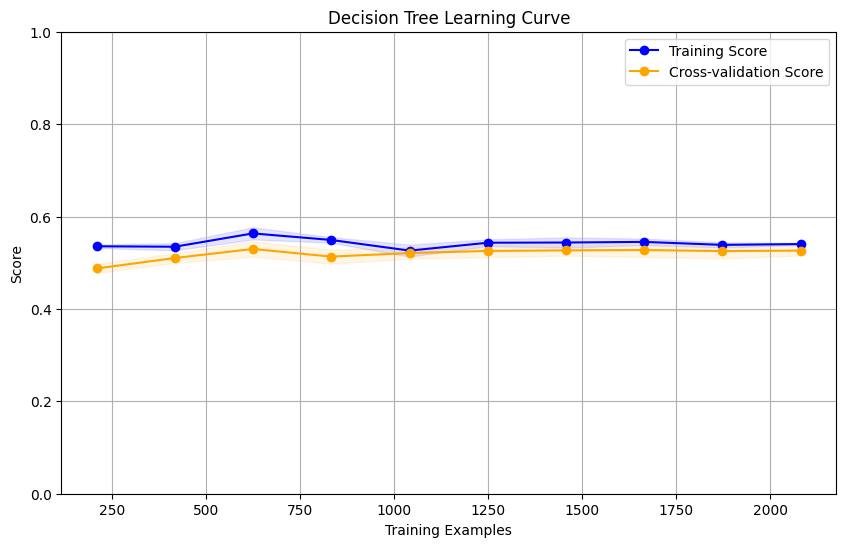

In [6]:

plot_learning_curve(best_nn_model, X_train, y_train, scoring='accuracy', title="Decision Tree Learning Curve")

### K-Nearest Neighbors

In [7]:
from knn import knn

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['distance'],
    'p': [1, 2]
}

best_knn_model, best_knn_params = knn(X_train, X_test, y_train, y_test, param_grid)

Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Classification Report:
                    precision    recall  f1-score   support

Attrited Customer       0.55      0.54      0.55       349
Existing Customer       0.48      0.49      0.48       302

         accuracy                           0.52       651
        macro avg       0.52      0.52      0.52       651
     weighted avg       0.52      0.52      0.52       651



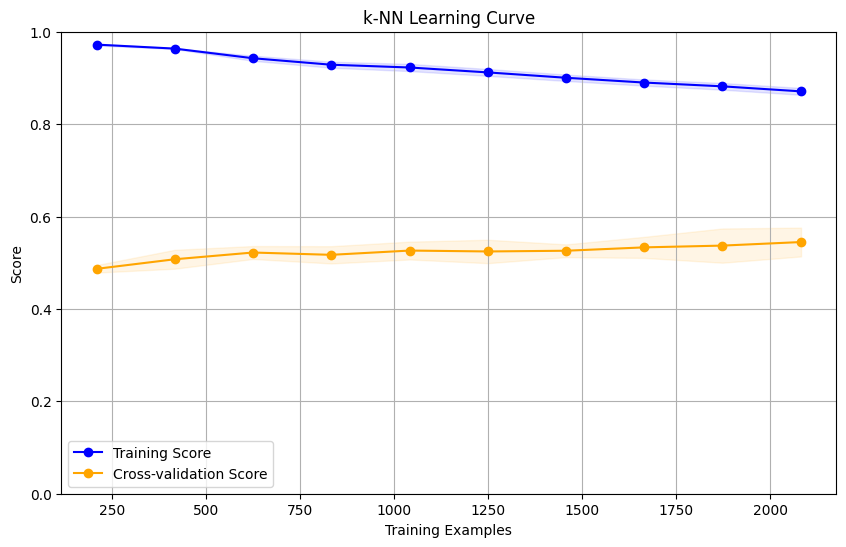

In [8]:
from graphs import plot_learning_curve
plot_learning_curve(best_knn_model, X_train, y_train, scoring='accuracy', title="k-NN Learning Curve")

### Boosted Decision Tree Classifier

In [9]:
from dt import ada_boosted_dt

# Define the parameter grid for AdaBoost
param_grid = {
    'base_estimator__max_depth': [None, 10, 20, 30],  # Adjust max_depth as needed
    'n_estimators': [50, 100, 200],  # Number of Decision Trees in the ensemble
    'learning_rate': [0.01, 0.1, 1.0]
}

best_bdt_model, best_bdt_params = ada_boosted_dt(X_train, X_test, y_train, y_test, param_grid)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/

Best AdaBoost Decision Tree Hyperparameters: {'base_estimator__max_depth': 30, 'learning_rate': 0.01, 'n_estimators': 50}
Classification Report:
                    precision    recall  f1-score   support

Attrited Customer       0.58      0.55      0.57       349
Existing Customer       0.51      0.54      0.53       302

         accuracy                           0.55       651
        macro avg       0.55      0.55      0.55       651
     weighted avg       0.55      0.55      0.55       651



In [ ]:
from graphs import plot_learning_curve
plot_learning_curve(best_bdt_model, X_train, y_train, scoring='accuracy', title="Decision Tree with Ada Boosting Learning Curve")

### Support Vector Machine


In [ ]:
from svm import svm
from sklearn.preprocessing import StandardScaler

# We need to scale the data before we pass it to the SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set the param grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4]
}

# Pass the scaled data to the svm
best_svm_model, best_svm_params = svm(X_train_scaled, X_test_scaled, y_train, y_test, param_grid)


In [ ]:
from graphs import plot_learning_curve
plot_learning_curve(best_svm_model, X_train_scaled, y_train, scoring='accuracy', title="SVM Learning Curve")